### IMDB Spoiler Dataset Overview

The IMDB Spoiler Dataset comprises two primary files, providing a comprehensive collection of user-generated reviews and metadata about movies and TV shows.

#### IMDB_reviews.json:

- **review_date:** Date when the review was written.
- **movie_id:** A unique identifier for the item, linking it to corresponding metadata in the IMDB_movie_details.json file.
- **user_id:** A unique identifier for the author of the review.
- **is_spoiler:** A binary indicator specifying whether the review contains spoilers or not.
- **review_text:** The textual content of the user's review, providing insights into their opinions and thoughts about the item.
- **rating:** The numerical rating assigned by the user to the item.
- **review_summary:** A concise summary accompanying the review, offering a quick overview of the user's sentiments.

#### IMDB_movie_details.json:

- **movie_id:** A unique identifier linking to the corresponding reviews in the IMDB_reviews file.
- **plot_summary:** A non-spoiler plot summary providing a brief overview of the item's storyline.
- **duration:** The runtime duration of the item.
- **genre:** The associated genres of the item.
- **rating:** The overall rating assigned to the item.
- **release_date:** The date when the item was released.
- **plot_synopsis:** A detailed synopsis of the item's plot, potentially containing spoiler content.

This dual-file dataset allows for a holistic understanding of user reviews, incorporating both textual sentiments and metadata associated with the movies and TV shows. The inclusion of spoiler indicators and non-spoiler plot summaries provides a valuable foundation for training and evaluating a deep learning model aimed at predicting and identifying spoilers within user reviews.


The **objective** of the project involves employing Natural Language Processing (NLP) techniques, specifically deep learning models, to address the challenge of identifying spoilers in IMDb reviews.

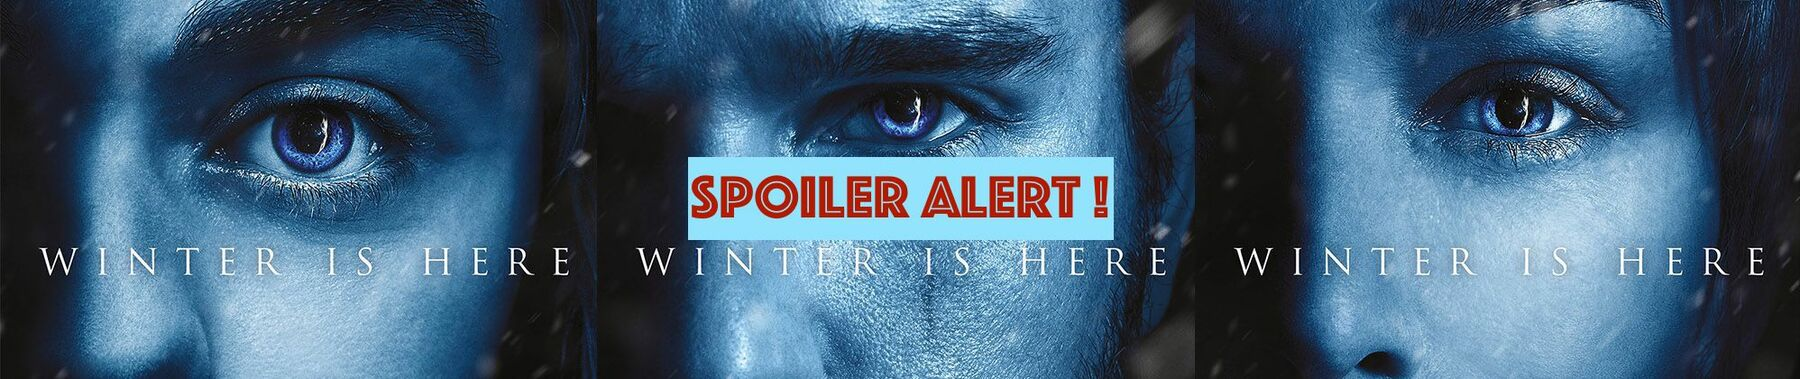

---




***This is where you come in!***  

**Problem Statement ->** Your goal is to develop a system wherein given a review, the model needs to determine whether it contains spoilers or not. This involves understanding the contextual nuances and language intricacies that signify potential plot revelations.


**Steps**
1. Data Collection, Exploration and Preprocessing
2. EDA
3. Pre-Modelling Data Preparation
4. Model Building
5. Model Evaluation
6. Summary



---



## Data Collection, Exploration and Preprocessing

In [4]:
# ## 1. Data Collection

# Import necessary libraries and modules
import torch  # Import the PyTorch library
from datetime import datetime  # Import the datetime module for time tracking
import gdown
import zipfile
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [5]:
pd.set_option('display.max_colwidth', None)

In [6]:
# ### Download Dataset
# The dataset can be downloaded using the provided code
zip_url = "https://drive.google.com/uc?id=1ApQIJqqML7pYzei54YY_SENC0V5R23bL" # use uc?id= instead of /view?usp=sharing


dataset_path = os.path.join("./dataset", "imdb_spoiler") # the dataset will be downloaded in this folder
zip_file_path = os.path.join(dataset_path, "imdb_spoiler_dataset.zip")

if not os.path.exists(dataset_path):
  os.makedirs(dataset_path)

if not os.path.exists(zip_file_path):
  gdown.download(zip_url, zip_file_path, quiet=False)

with zipfile.ZipFile(zip_file_path ,"r") as zip_ref:
  zip_ref.extractall(dataset_path)

Downloading...
From (original): https://drive.google.com/uc?id=1ApQIJqqML7pYzei54YY_SENC0V5R23bL
From (redirected): https://drive.google.com/uc?id=1ApQIJqqML7pYzei54YY_SENC0V5R23bL&confirm=t&uuid=df7e1c30-f30a-412c-9e09-78de1bc0e5c5
To: /Users/iumesh/Documents/dataset/imdb_spoiler/imdb_spoiler_dataset.zip
100%|██████████| 348M/348M [07:20<00:00, 789kB/s]  


---


### **Load the Reviews Json file & create a pandas dataframe out of it**

Steps-
1. Open JSON file using 'with open .....'
2. Iterate through the file & append to an empty list.
3. Use pd.DataFrame

Note- This is one of the ways to load data, there can be other ways too. Feel free to explore.

In [8]:
import pandas as pd
import json

# Step 1: Load the reviews JSON file
reviews = []
#with open('/content/dataset/imdb_spoiler/IMDB_reviews.json', 'r') as file:
with open('/Users/iumesh/Documents/dataset/imdb_spoiler/IMDB_reviews.json', 'r') as file:
  for line in file:
      reviews.append(json.loads(line))

# Step 2: Create a DataFrame from the list
reviews_df = pd.DataFrame(reviews)

# Display the DataFrame
print(reviews_df.head())


        review_date   movie_id    user_id  is_spoiler  \
0  10 February 2006  tt0111161  ur1898687        True   
1  6 September 2000  tt0111161  ur0842118        True   
2     3 August 2001  tt0111161  ur1285640        True   
3  1 September 2002  tt0111161  ur1003471        True   
4       20 May 2004  tt0111161  ur0226855        True   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [9]:
## check df shape, info, top 5 rows
print(reviews_df.shape)
print(reviews_df.info())
reviews_df.head(5)

(573913, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573913 entries, 0 to 573912
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review_date     573913 non-null  object
 1   movie_id        573913 non-null  object
 2   user_id         573913 non-null  object
 3   is_spoiler      573913 non-null  bool  
 4   review_text     573913 non-null  object
 5   rating          573913 non-null  object
 6   review_summary  573913 non-null  object
dtypes: bool(1), object(6)
memory usage: 26.8+ MB
None


review_date   movie_id    user_id  is_spoiler  \
0  10 February 2006  tt0111161  ur1898687        True   
1  6 September 2000  tt0111161  ur0842118        True   
2     3 August 2001  tt0111161  ur1285640        True   
3  1 September 2002  tt0111161  ur1003471        True   
4       20 May 2004  tt0111161  ur0226855        True   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

### **Similarly, Load the Movie Details Json file & create a pandas dataframe out of it**

In [10]:
# Step 1: Load the JSON file
movie_details = []
#with open('/content/dataset/imdb_spoiler/IMDB_movie_details.json', 'r') as file:
with open('/Users/iumesh/Documents/dataset/imdb_spoiler/IMDB_movie_details.json', 'r') as file:
  for line in file:
    movie_details.append(json.loads(line))

# Step 2: Create a DataFrame from the list
movie_details_df = pd.DataFrame(movie_details)

# Display the DataFrame
print(movie_details_df.head())

    movie_id  \
0  tt0105112   
1  tt1204975   
2  tt0243655   
3  tt0040897   
4  tt0126886   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [11]:
## check df shape, info, top 5 rows
movie_details_df.shape
movie_details_df.info()
movie_details_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   movie_id       1572 non-null   object
 1   plot_summary   1572 non-null   object
 2   duration       1572 non-null   object
 3   genre          1572 non-null   object
 4   rating         1572 non-null   object
 5   release_date   1572 non-null   object
 6   plot_synopsis  1572 non-null   object
dtypes: object(7)
memory usage: 86.1+ KB


movie_id  \
0  tt0105112   
1  tt1204975   
2  tt0243655   
3  tt0040897   
4  tt0126886   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  plot_summary  \
0  Former CIA analyst, Jack Ryan is in England with his family on vacation when he suddenly witnesses an explosion outside Buckingham Palace. It is revealed that some people are trying to abduct a member of the Royal Family but Jack intervenes, killing one of them and capturing the other, and stops the plan in its tracks. Afterwards, he learns that they're Irish revolutionaries and the two men are brothers. During his court hearing the one that's still alive vows to get back at Jack but is sentenced and that seems to be the end of it. However, whilst the man is being transported, he is broken out. Jack learns of this but doesn't think there's anything to worry about. But, when he is at the Naval Academy someone tries to kill him. He learns that they are also going after his family and so he rushes to find them, safe but having also been the victims of a failed assassination. That's when Jack decides to rejoin the CIA, and they try to find the man before he makes another attempt.                Written by\nrcs0411@yahoo.com   
1                                                                                                                                                                                                                                                                                                                                                                                           Billy (Michael Douglas), Paddy (Robert De Niro), Archie (Morgan Freeman) and Sam (Kevin Kline) have been best friends since childhood. So when Billy, the group's sworn bachelor, finally proposes to his thirty-something (of course) girlfriend, the four head to Las Vegas with a plan to stop acting their age and relive their glory days. However, upon arriving, the four quickly realize that the decades have transformed Sin City and tested their friendship in ways they never imagined. The Rat Pack may have once played the Sands and Cirque du Soleil may now rule the Strip, but it's these four who are taking over Vegas.                Written by\nProduction   
2                                                                                                                                                                                                                                                                                                                                                                                 The setting is Camp Firewood, the year 1981. It's the last day before everyone goes back to the real world, but there's still a summer's worth of unfinished business to resolve. At the center of the action is camp director Beth, who struggles to keep order while she falls in love with the local astrophysics professor. He is busy trying to save the camp from a deadly piece of NASA's Skylab which is hurtling t

### **Combine the 2 datasets**

In [12]:
# Your code here
merged_reviews_details_df = pd.merge(reviews_df, movie_details_df, on='movie_id')

In [13]:
## check df shape, info, top 5 rows
merged_reviews_details_df.shape
merged_reviews_details_df.info()
merged_reviews_details_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573906 entries, 0 to 573905
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review_date     573906 non-null  object
 1   movie_id        573906 non-null  object
 2   user_id         573906 non-null  object
 3   is_spoiler      573906 non-null  bool  
 4   review_text     573906 non-null  object
 5   rating_x        573906 non-null  object
 6   review_summary  573906 non-null  object
 7   plot_summary    573906 non-null  object
 8   duration        573906 non-null  object
 9   genre           573906 non-null  object
 10  rating_y        573906 non-null  object
 11  release_date    573906 non-null  object
 12  plot_synopsis   573906 non-null  object
dtypes: bool(1), object(12)
memory usage: 53.1+ MB


review_date   movie_id    user_id  is_spoiler  \
0  10 February 2006  tt0111161  ur1898687        True   
1  6 September 2000  tt0111161  ur0842118        True   
2     3 August 2001  tt0111161  ur1285640        True   
3  1 September 2002  tt0111161  ur1003471        True   
4       20 May 2004  tt0111161  ur0226855        True   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

### **Perform Data analysis after merging the 2 datasets**

Check if each movie id has reviews, movie details in the merged dataset.

In [14]:
movie_details_df['movie_id'].count()

np.int64(1572)

In [15]:
reviews_df['movie_id'].value_counts()

movie_id
tt0468569    4845
tt0111161    4361
tt0167260    2729
tt0137523    2480
tt0068646    2137
             ... 
tt0107719      12
tt6294822      11
tt0104014       5
tt0201265       4
tt0114142       2
Name: count, Length: 1572, dtype: int64

In [16]:
merged_reviews_details_df['movie_id'].value_counts()

movie_id
tt0468569    4845
tt0111161    4361
tt0167260    2729
tt0137523    2480
tt0068646    2137
             ... 
tt0101301      15
tt6868216      13
tt0107719      12
tt6294822      11
tt0201265       4
Name: count, Length: 1570, dtype: int64

In [17]:
# find out which movie id is missing in the merged dataframe
movie_details_df[~movie_details_df['movie_id'].isin(merged_reviews_details_df['movie_id'])]

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
1570,tt0104014/,"For a while now, beautiful 24-year-old Diana Bruni who's been happily married for five years, has been feeling distressed, experiencing an inexplicable, rather restless craving to finally live her life to the full and to break free from what society forbids. As this urge grows stronger by the day, Diana will ultimately yield to her carnal longings, and through a parade of particularly explicit nocturnal sensual adventures, she will utterly embrace passion, even if this comes by way of transgression. However, before long, the unaware husband, Paolo, will find all about his headstrong and disobedient wife's extra-marital escapades, raunchy experiences vividly retold by Diana's very lips, with the intention to rekindle their love and spice up their sexual life. Inevitably, poor Paolo disgraced, enraged and green with jealousy (or could it be envy?), will threaten to move out leaving for good his liberated and adulterous wife who seems to feel no contrition at all. But how can Diana make ... Written by\nNick Riganas",1h 33min,"[Comedy, Drama]",5.3,1992-02-21,
1571,tt0114142/,"The marriage of David Burgess, a senior executive, and his beautiful wife, Sara Burgess, an interior designer, is under great strain because David is in the process of putting together the biggest telecommunications merger in the history of the business. Sara suggests that they attend a kinky sex club to revitalize their marriage and help David to relax. However, David's problems are exacerbated by a huge power struggle at his office between Karen Stone, Gil Braman and himself. Karen, a beautiful, ambitious, ruthless, senior executive, is determined to take over this merger at any cost. To further her aims she hires the services of sleazy divorce private detective Ernie Fontenot to spy on the Burgess's. At the date of the merger draws near and all the blackmail and dirty tricks start to play themselves out, who will come out the winner? Written by\nMark Smith <msmith@osi.co.uk>",1h 32min,"[Drama, Thriller]",4.0,1999-01-29,


# There are incorrect entries for 2 movie ids - with a '/' at the end of each value. Remove it and re-merge datasets.

In [18]:
# remove '/' at the end of any movie id value in movie details df
movie_details_df['movie_id'] = movie_details_df['movie_id'].str.rstrip('/')

In [19]:
movie_details_df[~movie_details_df['movie_id'].isin(merged_reviews_details_df['movie_id'])]

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
1570,tt0104014,"For a while now, beautiful 24-year-old Diana Bruni who's been happily married for five years, has been feeling distressed, experiencing an inexplicable, rather restless craving to finally live her life to the full and to break free from what society forbids. As this urge grows stronger by the day, Diana will ultimately yield to her carnal longings, and through a parade of particularly explicit nocturnal sensual adventures, she will utterly embrace passion, even if this comes by way of transgression. However, before long, the unaware husband, Paolo, will find all about his headstrong and disobedient wife's extra-marital escapades, raunchy experiences vividly retold by Diana's very lips, with the intention to rekindle their love and spice up their sexual life. Inevitably, poor Paolo disgraced, enraged and green with jealousy (or could it be envy?), will threaten to move out leaving for good his liberated and adulterous wife who seems to feel no contrition at all. But how can Diana make ... Written by\nNick Riganas",1h 33min,"[Comedy, Drama]",5.3,1992-02-21,
1571,tt0114142,"The marriage of David Burgess, a senior executive, and his beautiful wife, Sara Burgess, an interior designer, is under great strain because David is in the process of putting together the biggest telecommunications merger in the history of the business. Sara suggests that they attend a kinky sex club to revitalize their marriage and help David to relax. However, David's problems are exacerbated by a huge power struggle at his office between Karen Stone, Gil Braman and himself. Karen, a beautiful, ambitious, ruthless, senior executive, is determined to take over this merger at any cost. To further her aims she hires the services of sleazy divorce private detective Ernie Fontenot to spy on the Burgess's. At the date of the merger draws near and all the blackmail and dirty tricks start to play themselves out, who will come out the winner? Written by\nMark Smith <msmith@osi.co.uk>",1h 32min,"[Drama, Thriller]",4.0,1999-01-29,


In [20]:
#Clear the merged review details df
merged_reviews_details_df = pd.DataFrame()
# Recreate merged dataset of movie reviews and movie details.
merged_reviews_details_df = pd.merge(reviews_df, movie_details_df, on='movie_id')

In [21]:
# Now, the merged datasets contains each movie id with it's details and reviews.
merged_reviews_details_df['movie_id'].value_counts()

movie_id
tt0468569    4845
tt0111161    4361
tt0167260    2729
tt0137523    2480
tt0068646    2137
             ... 
tt0107719      12
tt6294822      11
tt0104014       5
tt0201265       4
tt0114142       2
Name: count, Length: 1572, dtype: int64

### **Explore the combined dataset**
Some of the EDA steps can be-
(Note- There can be more, what we have listed down is just a subset, feel free to explore the dataset more, get insights, find more relationships b/w features...)

### 1. Analyze Class Distribution

In [ ]:
## Calculate Spoiler vs Non Spoiler % distribution
## Plot bar chart/pie chart anything would work in case of a % distribution. Any other plot in mind???

In [22]:
# Spoiler vs Non-Spoiler reviews count
merged_reviews_details_df['is_spoiler'].value_counts()


is_spoiler
False    422989
True     150924
Name: count, dtype: int64

In [23]:
merged_reviews_details_df['is_spoiler'].value_counts(normalize=True)


is_spoiler
False    0.737026
True     0.262974
Name: proportion, dtype: float64

<Axes: xlabel='is_spoiler'>

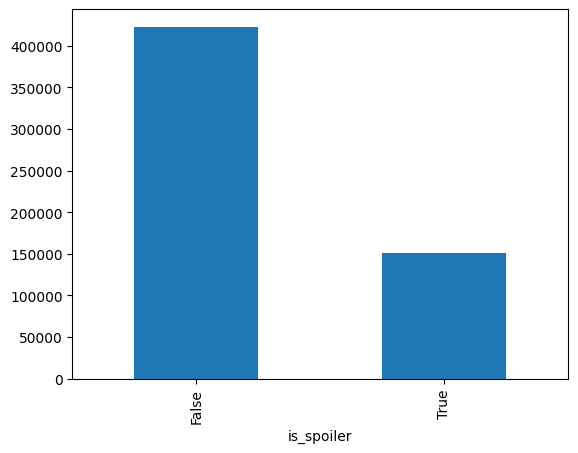

In [24]:
merged_reviews_details_df['is_spoiler'].value_counts().plot(kind='bar')


<Axes: ylabel='proportion'>

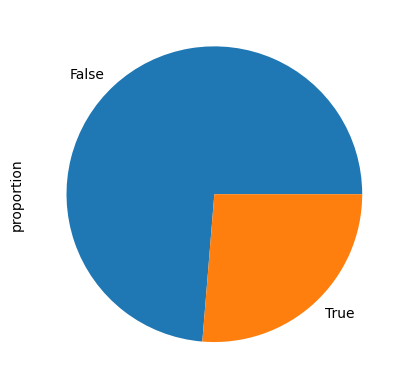

In [25]:
merged_reviews_details_df['is_spoiler'].value_counts(normalize=True).plot(kind='pie')

### 2. Analyze Word Count Distribution

In [26]:
# create a new column word_count with word counts in review_text of merged dataframe
merged_reviews_details_df['word_count'] = merged_reviews_details_df['review_text'].apply(lambda x: len(x.split()))

<Axes: ylabel='Frequency'>

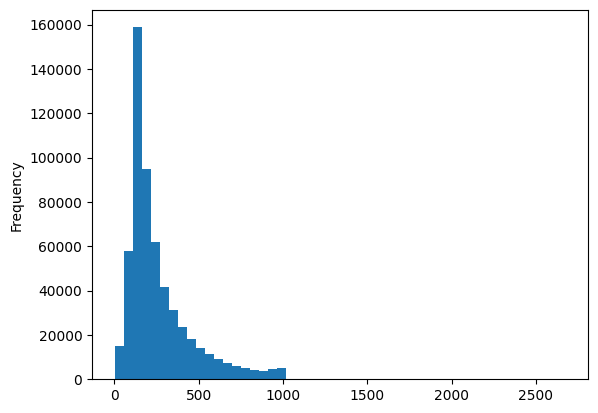

In [27]:
# Plot an appropriate chart for frequency distribution of number of words in every review in the merged dataframe, with x and y axis labels

merged_reviews_details_df['word_count'].plot(kind='hist', bins=50)

In [28]:
# print merged data frame in descending order of word_count
merged_reviews_details_df.sort_values(by='word_count', ascending=False)

review_date   movie_id     user_id  is_spoiler  \
329679   2 November 2003  tt0266697   ur1152974       False   
539014  14 November 2003  tt0118583   ur1187308        True   
295387       3 June 2002  tt0166924   ur1781895        True   
295351        9 May 2002  tt0166924   ur0208208        True   
316327       25 May 2003  tt0246460   ur1218783       False   
...                  ...        ...         ...         ...   
30552   24 December 2017  tt0120586  ur64553360       False   
547888  12 November 1998  tt0119643   ur0156762       False   
269257  20 December 2017  tt2239822  ur83454181       False   
33433   27 December 2017  tt0027977  ur83694676        True   
487228   15 October 1998  tt0102685   ur0111020       False   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [25]:
# from the merged dataframe, select one row each of a is_spoiler = true with highest number of word counts
merged_reviews_details_df[merged_reviews_details_df['is_spoiler'] == True].sort_values(by='word_count', ascending=False).head(1)

review_date   movie_id    user_id  is_spoiler  \
539014  14 November 2003  tt0118583  ur1187308        True   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [26]:
#select data for movie_id = tt0118583 and user_id = ur1187308
merged_reviews_details_df[(merged_reviews_details_df['movie_id'] == 'tt0118583') & (merged_reviews_details_df['user_id'] == 'ur1187308')]

review_date   movie_id    user_id  is_spoiler  \
539014  14 November 2003  tt0118583  ur1187308        True   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [ ]:
#select entire content of review_text from merged_review_details_df for above criteria
merged_reviews_details_df[(merged_reviews_details_df['movie_id'] == 'tt0118583') & (merged_reviews_details_df['user_id'] == 'ur1187308')]['review_text']

539014    ****The first two paragraphs are an extended plot description . If you have already seen the movie you may as well skip them******** For those who haven't seen the movie there may be some SLIGHT SPOILERS****\nIt has finally happened . After 200 years the unstoppable hostile beasts called aliens are resurrected . Lieutenant Ripley Ellen is long dead but the scientists found the secret to bring her back along with the alien queen embryo that she carried inside her . The greedy corporation Ripley worked for doesn't exist , but as long there is money and power hungry governments , somewhere , somehow , there will be someone who will fund an illegal program of bio-engineering in order to find the secret of the alien power . In this case the United Military Organization is behind this project although it is obvious that they are not even authorized by the Congress . They want to breed a new alien species to study them for purposes such as vaccines or alloys (but who are they kidding ? Inevitably the aliens will be exploited as a new super weapon) . The space base Auriga where the experiment is being conducted , is in orbit behind Pluto (naturally every illegal program takes place beyond the borders of the solar system) . The leader of Auriga is General Perez (Dan Hedaya) a rather mild mannered military officer who wants the project not to take a single risk . The scientists are led by Dr Wren (J.E. Freeman) and Dr Gediman (Brad Dourif) who are very enthusiastic about the potential of their task . They use frozen samples of Ripley 's blood in order to get the mixed human/alien D.N.A. and eventually clone Lt. Ripley (Sigourney Weaver) , resurrecting her and the alien fetus . The clone has not only the looks and physical shape of the deceased Ripley but unpredictably it has inherited all her memories and her psychological characteristics . There are also other side effects due to the genetic crossover and the clone shows some special features . The scientists isolate Ripley to study her later and focus on the Alien Queen which grows rapidly and incubates . In order to find some hosts for the face-huggers and the alien larvae , General Perez allies with a team of space smugglers led by Captain Elgyn (Michael Wincott) . They are black market merchandisers and in this case they supply Auriga with people they hijacked from other spaceships while they were on suspended animation . The unfortunate victims against their will are destined to be the first alien fodder . If you think the colonels are scumbags wait to hear where they get their financial sources : they cultivate vast quantities of cannabis ! This was an abandoned scene from the initial script and I thought it was best for you to know . Anyway , within a few days a bunch of aliens blossoms and everyone seems to be happy , but not for long .Captain Elgyn lands on Auriga with his spaceship called `Betty' and they stay for a couple of days for refueling . Elgyn definitely is not aware of the classified project and just wants his fee . The rest of the Betty 's crew are Johner (Ron Perlman) a tough , foul mouthed and ugly sexist goon , Vriess (Dominique Pinon) a handicapped short man who is stuck in a wheel chair and is a mechanic with quite `long hands' , Hillard (Kim Flowers) an attractive woman who is Elgyn 's girlfriend and Christie (Gary Dourdan) a skilled and methodical shooter with rasta hair who is calm and seems to be the second in command . The recently added member is a short young girl named Call (Winona Ryder) who is a talented engineer and is the misfit of the group . Call has read the banned books written centuries ago by the convict Morse (another abandoned line) and is the only one who knows the legends about Ellen Ripley and the aliens . Ripley on the other hand is kind of a savage and autistic child in an uncomfortable environment . She hates the scientists for bringing her back to revive her worst nightmare . The inevitable occurs very soon as the aliens br

### Additional note- You can also plot the above frequency distribution for each class, i.e. Spoiler & Non Spoiler

<Axes: ylabel='Frequency'>

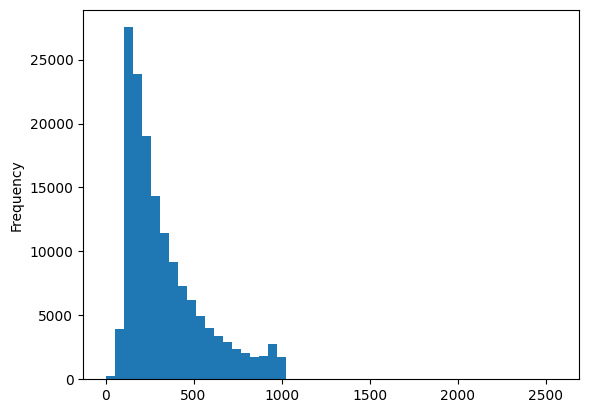

In [29]:
# plot the above frequency distribution for each class, i.e. Spoiler & Non Spoiler
merged_reviews_details_df[merged_reviews_details_df['is_spoiler'] == True]['word_count'].plot(kind='hist', bins=50)

The plot above, shows that larger number of reviews have smaller word count where is_spoiler is TRUE. Thus, there is no correlation of larger reviews containing higher chance of spoiler content in them.

Next, let's see if the same characterstic is shown of non-spoiler tagged reviews.

<Axes: ylabel='Frequency'>

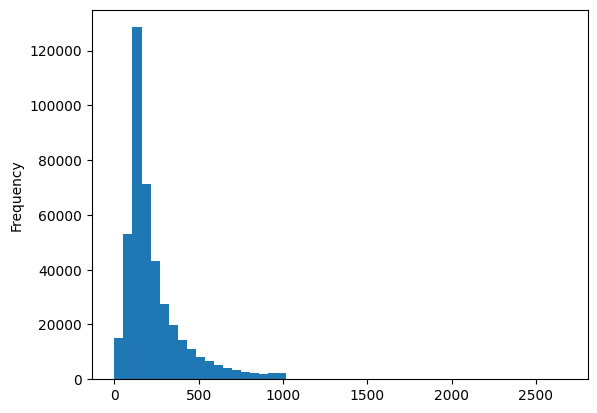

In [30]:
# plot the above frequency distribution for each class, i.e. Spoiler & Non Spoiler
merged_reviews_details_df[merged_reviews_details_df['is_spoiler'] == False]['word_count'].plot(kind='hist', bins=50)

**Observations**

*Document your observations for the analysis done till now, any findings, insights etc.*

- From above 2 histogram plots, we can summarize that the word count doesn't have a correlation of introductions of spoiler in a movie review.
-
-

### 3. Create a word cloud
This helps in visualizing important words in the dataset, the words that are being mostly used.

**Hint**- You would want to ideally remove the stopwords before creating a word cloud since the stopwords generally would be the most frequent words but those don't give any insights, right? Also, you can create word clouds for both the classes!

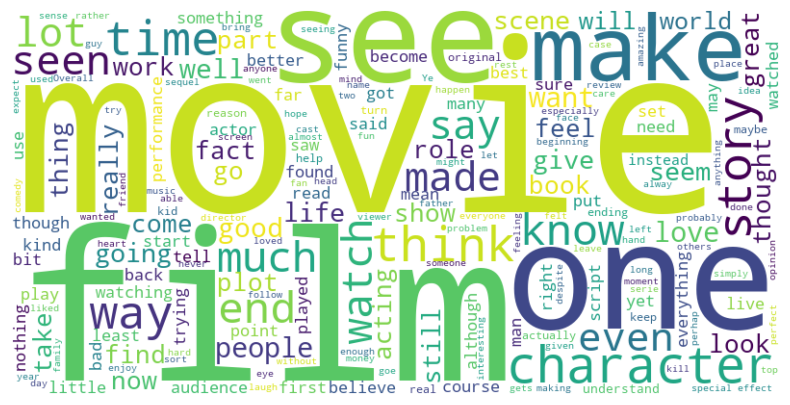

In [32]:
# create word cloud for is_spoiler is true in merged dataframe
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string
text = " ".join(review for review in merged_reviews_details_df['review_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
## remove stopwords- use nltk or spacy for that
import pandas as pd
from nltk.corpus import stopwords
import nltk

# Download stopwords list if not already available
nltk.download('stopwords')

# Create a copy of the DataFrame
cleaned_df = merged_reviews_details_df.copy()

# Define stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from each review
cleaned_df['cleaned_text'] = cleaned_df['review_text'].apply(
    lambda x: " ".join([word for word in x.split() if word.lower() not in stop_words])
)

# Display the first few rows of the new DataFrame
print(cleaned_df[['review_text', 'cleaned_text']].head())

In [38]:
cleaned_df[cleaned_df['review_text']!=cleaned_df['cleaned_text']]

review_date   movie_id    user_id  is_spoiler  \
0       10 February 2006  tt0111161  ur1898687        True   
1       6 September 2000  tt0111161  ur0842118        True   
2          3 August 2001  tt0111161  ur1285640        True   
3       1 September 2002  tt0111161  ur1003471        True   
4            20 May 2004  tt0111161  ur0226855        True   
...                  ...        ...        ...         ...   
573908     8 August 1999  tt0139239  ur0100166       False   
573909      31 July 1999  tt0139239  ur0021767       False   
573910      20 July 1999  tt0139239  ur0392750       False   
573911      11 June 1999  tt0139239  ur0349105       False   
573912        3 May 1999  tt0139239  ur0156431       False   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

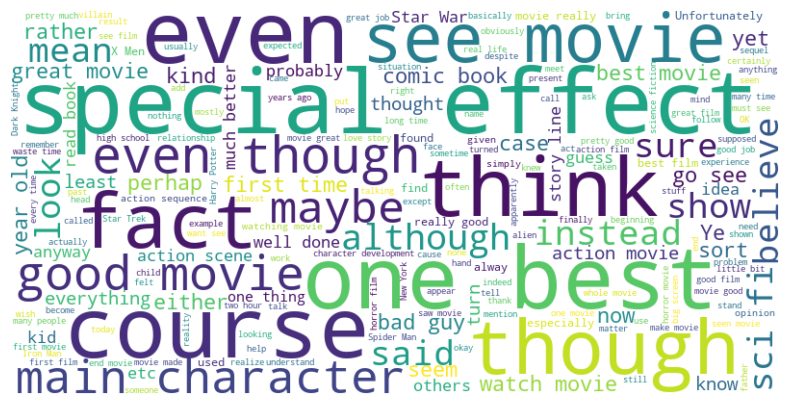

In [37]:
# create word cloud for is_spoiler is true in merged dataframe
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into a single string
text = " ".join(review for review in cleaned_df['cleaned_text'])

# Generate the word cloud
wordcloud_clean = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_clean, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

In [36]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
## create wordcloud for both the classes & visualize


In [ ]:
# Your code here

### 4. Calculate similarity b/w reviews & plot summary
The hypothesis we're trying to test here- is there a similarity b/w the reviews with spoilers & movie plot summary? Intuitively we would expect that if a user has given a spoiler in a movie review, it should have a high similarity with the movie plot, isn't it? That's exactly what you would test here!

There are multiple ways of calculating similarity b/w 2 sets of text-

1. Using TFIDF vectorization
2. Using Pretrained-embeddings
.
.

We are sharing the imports necessary for using TFIDF vectorization for converting text to vectors.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm.notebook import tqdm

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


In [ ]:
## TFIDF vectorization
# Your code here

What next after converting text to vectors? How do we measure the similarity? Again we have different types of similarity measures. One of them is cosine similarity & is probably the most frequent method used for similarity. Reference- https://medium.com/@ahmetmnirkocaman/how-to-measure-text-similarity-a-comprehensive-guide-6c6f24fc01fe

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
## Function to calculate similarity
# Your code here

### This completes the EDA part. We would highly encourage you to add more subsections to EDA & explore the data in more depth, if you have more time. Let's get down to Text preprocessing & then the modeling part!!

## Text Preprocessing

Steps-
1. Analyze & observe the patterns in text, because data cleaning depends a lot on your use case.
2. Remove special characters, any hyperlinks etc. Pls note that sometimes special characters like ! etc. can also add to the context, so remove the special characters accordingly.
3. Remove stopwords, again depending on your text corpus.


In [ ]:
# Your code here

### **Model Training - Tips and Tricks**
- Since the dataset is huge, you can train the model on a **smaller subset of data**. This will reduce both the training time & the compute required. Just observe the class distribution to decide how do you want to take a subset- if the dataset is highly imbalanced, we would suggest you to do a majority undersampling to reduce the size of data, otherwise do a stratified sampling to ensure the same event rate as that of population.
- We encourage you to try out several model architectures and algorithms such as simple feed forward neural networks, Neural Networks based embeddings followed by classical models such as Logistic regression, RNNs/LSTMs and Transformer based models such as BERT.
- If you wish to train large models such as BERT, you will require access to GPUs. Colab provides access to GPUs, but it requires you to interactively work on the notebook.
Therefore, it is strongly recommended that you utilize Kaggle wherever possible. Kaggle offers you 35 hours of High Performance Multi-GPU compute per week.
- It is often assumed that Kaggle is just a notebook based environment, and you need to actively interact with the notebook to keep it running. The same isn’t true. You can easily run your notebooks as asynchronous jobs on Kaggle, save your models/datasets as outputs, and load those outputs (models/datasets) for further analysis.
- This guide, although a bit old explains how to commit and run your Kaggle notebooks and use their outputs later: https://towardsdatascience.com/saving-and-loading-pytorch-models-in-kaggle-3dadc0af1bd9

## Modeling

### Train, Validation and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

## create 3 subsets of data- train, validation & test with 70,15 & 15 percent respectively!

# Your code here


### BERT Model finetuning using HuggingFace Transformers & Pytorch
Again, similar to previous parts, this one can also be done in multiple ways like using a HuggingFace trainer class which kind of abstracts the Pytorch training loops, we encourage you to explore that approach as well! But since one of the objectives of the project is also to get more hands-on on Pytorch framework, its Dataloader classes etc, we expect you to attempt this using Pytorch!

### Required Imports

In [ ]:
import torch.nn as nn  # Import PyTorch's neural network module
from transformers import AutoTokenizer, AutoModelForSequenceClassification  # Import specific modules from the Hugging Face Transformers library
from datasets import load_dataset  # Import a function to load datasets
from torch.utils.data import DataLoader, TensorDataset  # Import PyTorch data loading utilities
from tqdm import tqdm  # Import tqdm for progress tracking
import os  # Import the os module for operating system-related functions
from sklearn.metrics import classification_report, accuracy_score

### Model Training Steps

In [ ]:
# Step-1

## Set the device to GPU if available, otherwise use CPU
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
# Step-2

## Define args dictionary
# Your code here

In [ ]:
# Step-3

# Set hyperparameters and other configurations
batch_size = args['batch_size']  # Get the batch size from the arguments
learning_rate = args['learning_rate']  # Get the learning rate from the arguments
epochs = args['epochs']  # Get the number of training epochs from the arguments
max_length = args['max_length']  # Get the maximum sequence length from the arguments

In [ ]:
# Step-4

## Assign the model name to a variable
model_name = "google-bert/bert-base-uncased"

In [ ]:
# Step-5

## Initialize Bert Tokenizer using Autotokenizer class
# Your code here

In [ ]:
# Step-6

## Separate out the text & labels from train, val & test dataframes
# Your code here

In [ ]:
# Step-7

## Tokenize & encode each subset of data
train_encodings= # Your code here
val_encodings= # Your code here
test_encodings= # Your code here

In [ ]:
# Step-8

## Create PyTorch datasets using train_encodings, val_encodings & test_encodings
# Your code here

In [ ]:
# Step-9

## Create data loaders
train_loader= # Your code here
val_loader= # Your code here
test_loader= # Your code here

In [ ]:
# Step-10

## Define the BERT-based text classifier model using AutoModelForSequenceClassification class
# Your code here

In [ ]:
# Step-11

## Training and validation loop
for epoch in tqdm(range(epochs)):
    model.train()  # Set the model in training mode
    total_loss = 0.0  # Initialize a variable to store the total loss

    for batch in tqdm(train_loader, leave=False):  # Iterate over training data batches

    # Your code here





In [ ]:
# Step-12

## Testing loop

model.eval()  # Set the model in evaluation mode
test_loss = 0
correct = 0

with torch.no_grad():  # Disable gradient computation for testing
    for batch in test_loader:  # Iterate over test data batches
    # Your code here






## Model Evaluation

Evaluate the above models based on the various evaluation metrics like accuracy, precision, recall, F1-score, etc.

In [ ]:
# Step-1

## Build confusion matrix
# Your code here

In [ ]:
# Step-2

## Print the classification report

# Your code here

In [ ]:
# Step-3

## Plot the training & validation loss
# Your code here.

**Observations**

*Document your observations regarding the different models that you have built, and their evaluation metrics*

-
-
-

***Checklist***

Ensure that the following is done:

- The accuracy/precision/recall of the best model is at least between 60-70%
- Observe the context window for the model you pick because that will truncate the text input length & hence the context that the model will have. This ofcourse impacts the model performance. So you can look for larger BERT models from HuggingFace repo to increase the context length but the trade-off is more compute time & resources!

## Summary

Good work completing all the steps till now!

Now, go ahead and summarize your entire work and findings below:

-
-
-

### **Future Improvements(Optional)**
- **Approach-2 for Model Training**

Feel free to refer the below article to understand another approach for Bert finetuning which is using the trainer class from HuggingFace transformers. It abstracts the Pytorch loops & is more convenient but Pytorch loops provide more flexibility- https://github.com/philschmid/deep-learning-pytorch-huggingface/blob/main/training/pytorch-2-0-bert-text-classification.ipynb




---



---
- **Improving the Model Performance**:

  In the previous model training exercise, you had taken the entire dataset and randomly curated 25000 reviews. Now, randomly selecting reviews may not provide enough clear examples of spoilers, as most reviews, even of popular movies, might not include explicit spoilers. Selectively curating your dataset could significantly improve the model's performance. Here are some suggestions to improve the dataset for better spoiler detection:

  **Identify Top Movies**: Focus on movies with the most reviews, such as The Dark Knight, Shawshank Redemption, and The Godfather.

  **Class Distribution**: Check how many reviews fall under the Spoiler vs. Non-Spoiler classes.

  **Filter Reviews**: Only keep reviews within ~200-350 words. This ensures that longer reviews are used for better training but they’re not too long (to fit BERT's 512-token limit).

  **Target 10K Spoiler Reviews**: Select the top k movies whose Spoiler reviews add up to around 10,000.

  **Balanced Dataset**: After filtering, aim for a dataset where every Spoiler review has a matching Non-Spoiler review, resulting in 20,000 balanced data points.

  **Initial Model Inference**: Use these selected movies for initial model building. Adjust the business problem if needed.

  You can also build similar models by curating specific datasets to improve data quality. Accordingly you can see if the model performance is increasing or decreasing. However a warning: This may lead to your colab compute reducing drastically, hence build the models wisely.